In [8]:
import math
import re
import os
import warnings

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn
import plotly.express as px

%matplotlib inline
pd.set_option('display.max_rows', 20)
os.listdir()

['.ipynb_checkpoints',
 'archive',
 'ATLA Scraping.ipynb',
 'atla_script.csv',
 'debug.log',
 'Untitled.ipynb']

In [9]:
df = pd.read_csv('atla_script.csv')
df

,book,episode,title,character,text
0,1,1,The Boy in the Iceberg,Katara,Water. Earth. Fire. Air. My grandmother used t...
1,1,1,The Boy in the Iceberg,NaN,"As the title card fades, the scene opens onto ..."
2,1,1,The Boy in the Iceberg,Sokka,It's not getting away from me this time. [Clos...
3,1,1,The Boy in the Iceberg,NaN,"The shot pans quickly from Sokka to Katara, wh..."
4,1,1,The Boy in the Iceberg,Katara,"[Happily surprised.] Sokka, look!"
...,...,...,...,...,...
13443,3,21,"Sozin's Comet, Part 4: Avatar Aang",Sokka,I thought it looked more exciting that way. [M...
13444,3,21,"Sozin's Comet, Part 4: Avatar Aang",Iroh,"[Points at painting.] Hey, my belly's not that..."
13445,3,21,"Sozin's Comet, Part 4: Avatar Aang",Toph,Well I think you all look perfect! [They laugh.]
13446,3,21,"Sozin's Comet, Part 4: Avatar Aang",NaN,"Aang walks past Appa, petting him briefly, bef..."


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Aang'),
  Text(1, 0, 'Sokka'),
  Text(2, 0, 'Katara'),
  Text(3, 0, 'Zuko'),
  Text(4, 0, 'Toph'),
  Text(5, 0, 'Iroh'),
  Text(6, 0, 'Azula'),
  Text(7, 0, 'Jet'),
  Text(8, 0, 'Suki'),
  Text(9, 0, 'Zhao'),
  Text(10, 0, 'Mai'),
  Text(11, 0, 'Hakoda'),
  Text(12, 0, 'Roku'),
  Text(13, 0, 'Ty Lee'),
  Text(14, 0, 'Main'),
  Text(15, 0, 'Ozai'),
  Text(16, 0, 'Bumi'),
  Text(17, 0, 'Yue'),
  Text(18, 0, 'Warden'),
  Text(19, 0, 'Hama')])

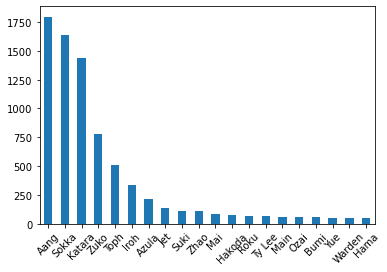

In [15]:
df.character.value_counts()[:20].plot.bar()
plt.xticks(rotation=45)

In [147]:
for char in set(df.character.values):
    if type(char) == str:
        if ':' in char:
            print(char)
    else:
        continue

Sha-Mo:
Aang:


In [141]:
char = 'Arnook'
df[df.character==char]#.text[3661]

,book,episode,title,character,text
4079,1,18,The Waterbending Master,Arnook,"Tonight, we celebrate the arrival of our broth..."
4081,1,18,The Waterbending Master,Arnook,"Now, Master Pakku and his students will perform!"
4094,1,18,The Waterbending Master,Arnook,"Master Pakku, meet your newest student, the Av..."
4213,1,18,The Waterbending Master,Arnook,What do you want me to do? Force Master Pakku ...
4215,1,18,The Waterbending Master,Arnook,"I suspect he might change his mind, if you swa..."
4339,1,19,"The Siege of the North, Part 1",Arnook,The day we have feared for so long has arrived...
4342,1,19,"The Siege of the North, Part 1",Arnook,"Be warned, many of you will not return. [Sever..."
4344,1,19,"The Siege of the North, Part 1",Arnook,The stillness before battle is unbearable. Suc...
4360,1,19,"The Siege of the North, Part 1",Arnook,"Men, you'll be infiltrating the Fire Nation Na..."
4366,1,19,"The Siege of the North, Part 1",Arnook,Eighty-five.
